<a href="https://colab.research.google.com/github/fwang312/Airbnb-User-Booking/blob/master/GDP_Happiness_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [16]:
import os
os.chdir("/content/drive/My Drive/Hands on ML/book/datasets/lifesat")
!ls

gdp_per_capita.csv  oecd_bli_2015.csv  README.md


In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

In [0]:
#Load the data
oecd_bli = pd.read_csv('oecd_bli_2015.csv', thousands=',')
gdp_per_capita = pd.read_csv('gdp_per_capita.csv', thousands=',', delimiter = '\t',encoding='latin1',na_values='n/a')

In [0]:
#prepare the data
def prepare_country_stats(oecd_bli, gdp_per_capita):
    #get the pandas dataframe of GDP per capita and Life satisfaction
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2015": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita, left_index=True, right_index=True)
    return full_country_stats[["GDP per capita", 'Life satisfaction']]
    
country_stats = prepare_country_stats(oecd_bli, gdp_per_capita) 

In [0]:
country_stats.to_csv('country_stats.csv',encoding='utf-8')
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

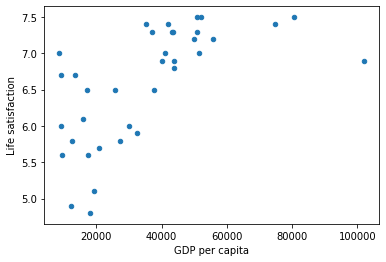

In [39]:
# Visualize the data
country_stats.plot(kind = 'scatter', x = 'GDP per capita', y = 'Life satisfaction')
plt.show()

In [0]:
# Slect a Linear model
model = sklearn.linear_model.LinearRegression()

In [45]:
# Train the model
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

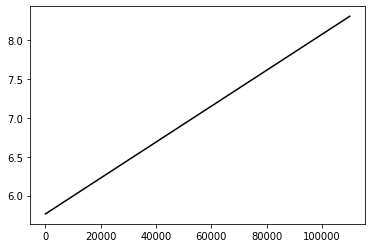

In [50]:
#plot Regression model
t0, t1 = model.intercept_[0], model.coef_[0][0]
X = np.linspace(0, 110000, 1000)
plt.plot(X, t0 + t1 * X, "k")
plt.show()

In [49]:
# Make a prediction for Cyprus
X_new = [[22587]]
print(model.predict(X_new))

[[6.28653637]]
